In [818]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [819]:
btc_1h = pd.read_csv ('./btc_1h_backtest.csv', encoding='unicode_escape')

In [820]:
btc_1h['time'] = btc_1h['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
btc_1h['time'] = pd.to_datetime(btc_1h["time"])
btc_1h.set_index("time", inplace = True)

In [821]:
btc_1h= btc_1h[1500:7000]
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI
time,,,,,,,,,,,,
2021-03-04 13:00:00,49391.5,49560.40601,49928.99777,50734.25591,49123.73964,51539.51404,48318.48150,52344.77218,47513.22337,1023.434,18.984553,44.882347
2021-03-04 14:00:00,49629.5,49575.76023,49901.77070,50715.26040,49088.28101,51528.75010,48274.79131,52342.23980,47461.30161,1421.870,24.996372,47.212038
2021-03-04 15:00:00,49444.0,49546.48018,49860.15518,50711.53847,49008.77189,51562.92177,48157.38860,52414.30506,47306.00531,2287.328,26.648864,45.594438
2021-03-04 16:00:00,49466.5,49528.70680,49824.36835,50680.36712,48968.36958,51536.36589,48112.37081,52392.36466,47256.37204,1683.836,33.016760,45.836845
2021-03-04 17:00:00,49743.0,49576.32751,49816.97123,50660.79151,48973.15094,51504.61180,48129.33065,52348.43209,47285.51037,913.115,49.654242,48.852778


In [822]:
btc_1h.keys()

Index(['close', 'EMA 1', 'EMA 2', 'Upper ATR 1', 'Lower ATR 1', 'Upper ATR 2',
       'Lower ATR 2', 'Upper ATR 3', 'Lower ATR 3', 'Volume', 'K', 'RSI'],
      dtype='object')

In [823]:
def buySell_Long(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['RSI'][i] < 20 and btc_1h['close'][i] <= btc_1h['Lower ATR 3'][i]):
      if flag != 1:
        sigPriceBuy.append(btc_1h['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h ['RSI'][i] > 55 and btc_1h['close'][i] >= btc_1h['Upper ATR 1'][i]):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [824]:
buySell = buySell_Long(btc_1h)
btc_1h['Buy Signal Price (L)'] = buySell[0]
btc_1h['Sell Signal Price (L)'] = buySell[1]
# To show the data
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price (L),Sell Signal Price (L)
time,,,,,,,,,,,,,,
2021-03-04 13:00:00,49391.5,49560.40601,49928.99777,50734.25591,49123.73964,51539.51404,48318.48150,52344.77218,47513.22337,1023.434,18.984553,44.882347,NaN,NaN
2021-03-04 14:00:00,49629.5,49575.76023,49901.77070,50715.26040,49088.28101,51528.75010,48274.79131,52342.23980,47461.30161,1421.870,24.996372,47.212038,NaN,NaN
2021-03-04 15:00:00,49444.0,49546.48018,49860.15518,50711.53847,49008.77189,51562.92177,48157.38860,52414.30506,47306.00531,2287.328,26.648864,45.594438,NaN,NaN
2021-03-04 16:00:00,49466.5,49528.70680,49824.36835,50680.36712,48968.36958,51536.36589,48112.37081,52392.36466,47256.37204,1683.836,33.016760,45.836845,NaN,NaN
2021-03-04 17:00:00,49743.0,49576.32751,49816.97123,50660.79151,48973.15094,51504.61180,48129.33065,52348.43209,47285.51037,913.115,49.654242,48.852778,NaN,NaN


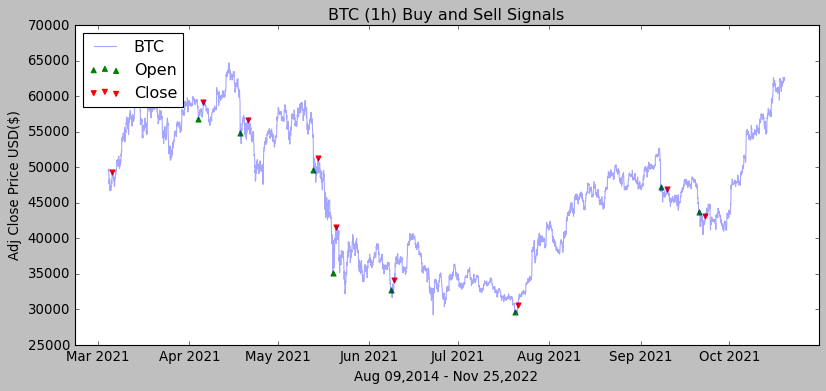

In [825]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
plt.plot(btc_1h['Buy Signal Price (L)'], label='', alpha=0.35)
plt.plot(btc_1h['Sell Signal Price (L)'],label='', alpha=0.35)
plt.scatter(btc_1h.index, btc_1h['Buy Signal Price (L)'], label ='Open', marker='^',color='green')
plt.scatter(btc_1h.index, btc_1h['Sell Signal Price (L)'],label='Close', marker='v', color='red')
plt.title('BTC (1h) Buy and Sell Signals')
plt.xlabel("Aug 09,2014 - Nov 25,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()

In [826]:
def buySell_Short(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['close'][i] >= btc_1h ["Upper ATR 3"][i] and btc_1h ['RSI'][i] > 80):
      if flag != 1:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h["RSI"][i] < 45 and btc_1h ['EMA 1'][i] < btc_1h ['EMA 2'][i]):
      if flag != 0:
        sigPriceBuy.append(btc_1h["close"][i])
        sigPriceSell.append(np.nan)
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceSell, sigPriceBuy)

In [827]:
buySell_Short = buySell_Short(btc_1h)
btc_1h['Buy Signal Price (S)'] = buySell_Short[1]
btc_1h['Sell Signal Price (S)'] = buySell_Short[0]
# To show the data
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price (L),Sell Signal Price (L),Buy Signal Price (S),Sell Signal Price (S)
time,,,,,,,,,,,,,,,,
2021-03-04 13:00:00,49391.5,49560.40601,49928.99777,50734.25591,49123.73964,51539.51404,48318.48150,52344.77218,47513.22337,1023.434,18.984553,44.882347,NaN,NaN,49391.5,NaN
2021-03-04 14:00:00,49629.5,49575.76023,49901.77070,50715.26040,49088.28101,51528.75010,48274.79131,52342.23980,47461.30161,1421.870,24.996372,47.212038,NaN,NaN,NaN,NaN
2021-03-04 15:00:00,49444.0,49546.48018,49860.15518,50711.53847,49008.77189,51562.92177,48157.38860,52414.30506,47306.00531,2287.328,26.648864,45.594438,NaN,NaN,NaN,NaN
2021-03-04 16:00:00,49466.5,49528.70680,49824.36835,50680.36712,48968.36958,51536.36589,48112.37081,52392.36466,47256.37204,1683.836,33.016760,45.836845,NaN,NaN,NaN,NaN
2021-03-04 17:00:00,49743.0,49576.32751,49816.97123,50660.79151,48973.15094,51504.61180,48129.33065,52348.43209,47285.51037,913.115,49.654242,48.852778,NaN,NaN,NaN,NaN


In [828]:
btc_1h.describe()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price (L),Sell Signal Price (L),Buy Signal Price (S),Sell Signal Price (S)
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03,5500.000000,8.000000,9.000000,10.000000,9.000000
mean,46441.467909,46433.319980,46419.219975,46966.755825,45871.684124,47514.291675,45324.148274,48061.827525,44776.612424,2128.202735,5.125927e+01,51.161631,43683.875000,45880.333333,49782.400000,50299.222222
std,9286.804470,9262.931860,9223.409541,9262.192131,9190.281788,9306.558861,9162.870205,9356.430296,9141.226215,2356.919257,3.314956e+01,12.349406,10252.165168,9535.936615,10513.380072,11842.513297
min,29216.500000,29680.507330,29815.961530,30048.048090,29570.367970,30280.134650,29320.202490,30512.221210,28866.497710,136.332000,-2.130000e-14,12.911394,29599.500000,30630.000000,32129.000000,32101.000000
25%,37773.750000,37777.031195,37750.055842,38538.446375,36957.445587,39091.717935,36230.078103,39653.013903,35553.491357,853.761250,1.979447e+01,42.820409,34478.250000,41657.500000,41749.250000,39270.000000
50%,47091.000000,47119.083640,47075.003000,47560.791305,46602.309410,48024.451005,46157.452670,48461.366730,45652.454495,1553.892000,5.107146e+01,51.227844,45477.750000,46985.000000,51697.750000,54522.000000
75%,55158.125000,55240.409265,55410.793895,56034.389863,54722.874368,56635.881515,54041.812170,57237.999500,53378.632865,2570.175500,8.370787e+01,59.754912,50905.500000,51237.000000,58546.000000,61200.000000
max,64659.500000,64176.529860,63682.513780,64333.074710,63031.952850,65023.991850,62388.941890,65786.139590,61771.101990,53613.055000,1.000000e+02,90.804055,56779.000000,59149.500000,62453.500000,62990.500000


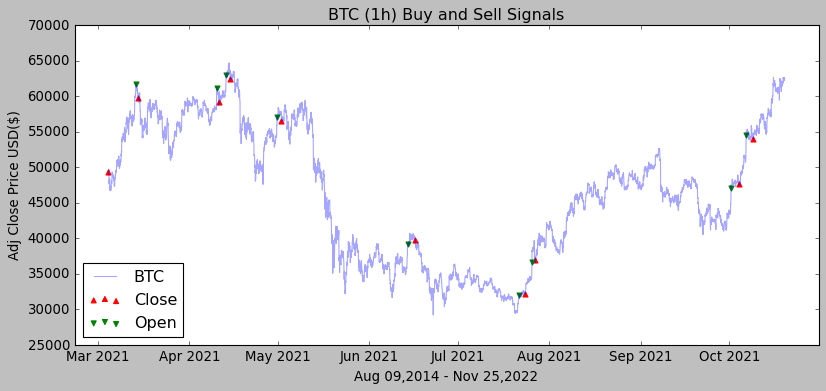

In [829]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
plt.plot(btc_1h['Buy Signal Price (S)'], label='', alpha=0.35)
plt.plot(btc_1h['Sell Signal Price (S)'],label='', alpha=0.35)
plt.scatter(btc_1h.index, btc_1h['Buy Signal Price (S)'], label ='Close', marker='^',color='red')
plt.scatter(btc_1h.index, btc_1h['Sell Signal Price (S)'],label='Open', marker='v', color='green')
plt.title('BTC (1h) Buy and Sell Signals')
plt.xlabel("Aug 09,2014 - Nov 25,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='lower left')
plt.show()

In [830]:
def buySell_Long_2(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['RSI'][i] < 20 and btc_1h["K"][i] > 10):
      if flag != 1:
        sigPriceBuy.append(btc_1h['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h['RSI'][i] > 55):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [831]:
buySell_Long_2 = buySell_Long_2(btc_1h)
btc_1h['Buy Signal Price (L2)'] = buySell_Long_2[0]
btc_1h['Sell Signal Price (L2)'] = buySell_Long_2[1]
# To show the data
btc_1h.head()

,close,EMA 1,EMA 2,Upper ATR 1,Lower ATR 1,Upper ATR 2,Lower ATR 2,Upper ATR 3,Lower ATR 3,Volume,K,RSI,Buy Signal Price (L),Sell Signal Price (L),Buy Signal Price (S),Sell Signal Price (S),Buy Signal Price (L2),Sell Signal Price (L2)
time,,,,,,,,,,,,,,,,,,
2021-03-04 13:00:00,49391.5,49560.40601,49928.99777,50734.25591,49123.73964,51539.51404,48318.48150,52344.77218,47513.22337,1023.434,18.984553,44.882347,NaN,NaN,49391.5,NaN,NaN,NaN
2021-03-04 14:00:00,49629.5,49575.76023,49901.77070,50715.26040,49088.28101,51528.75010,48274.79131,52342.23980,47461.30161,1421.870,24.996372,47.212038,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-04 15:00:00,49444.0,49546.48018,49860.15518,50711.53847,49008.77189,51562.92177,48157.38860,52414.30506,47306.00531,2287.328,26.648864,45.594438,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-04 16:00:00,49466.5,49528.70680,49824.36835,50680.36712,48968.36958,51536.36589,48112.37081,52392.36466,47256.37204,1683.836,33.016760,45.836845,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-04 17:00:00,49743.0,49576.32751,49816.97123,50660.79151,48973.15094,51504.61180,48129.33065,52348.43209,47285.51037,913.115,49.654242,48.852778,NaN,NaN,NaN,NaN,NaN,NaN


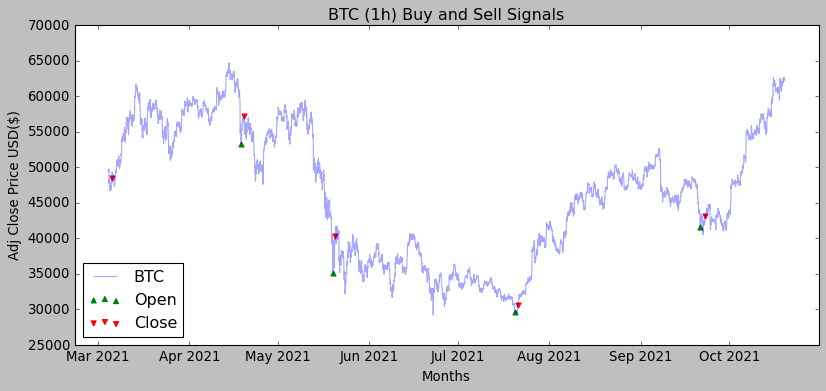

In [833]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
plt.plot(btc_1h['Buy Signal Price (L2)'], label='', alpha=0.35)
plt.plot(btc_1h['Sell Signal Price (L2)'],label='', alpha=0.35)
plt.scatter(btc_1h.index, btc_1h['Buy Signal Price (L2)'], label ='Open', marker='^',color='green')
plt.scatter(btc_1h.index, btc_1h['Sell Signal Price (L2)'],label='Close', marker='v', color='red')
plt.title('BTC (1h) Buy and Sell Signals')
plt.xlabel("Months")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='lower left')
plt.show()